In [30]:
!pip install heartpy hrv-analysis


     |████████████████████████████████| 11.1 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 743 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 682 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 1.9 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=450c907d854e0a5c03662676bd2360d87d462dbeffdd8187c43899781a2827d2
  Stored in directory: /home/igor/.cache/pip/wheels/22/73/06/557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built future


In [8]:
import pandas
import heartpy as hp
import numpy as np
%matplotlib inline
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
from hrvanalysis import get_time_domain_features


In [3]:
### 
numerical_columns = ["col {}".format(el) for el in range(50)]



In [45]:
heartrate_file = pandas.read_csv("results/mori1__2022-05-23T06_24_10.222504.csv",
                                 names = ["time","rri", "error"]+ numerical_columns)

In [52]:
list(heartrate_file["rri"][heartrate_file["rri"]!=0])

[844,
 860,
 876,
 860,
 944,
 992,
 988,
 996,
 992,
 976,
 940,
 992,
 1008,
 1020,
 1024,
 1024,
 996,
 992,
 972,
 980,
 940,
 924,
 876,
 856,
 684,
 828,
 808,
 860,
 808,
 808,
 828,
 856,
 792,
 808,
 636,
 808,
 920,
 996,
 972,
 1028,
 1040,
 1044,
 1032,
 796,
 1052,
 1024,
 1148,
 1048,
 1052,
 1056,
 1024,
 1008,
 976,
 976,
 892,
 960,
 992,
 1024,
 972,
 976,
 992,
 992,
 976,
 1008,
 1012,
 1008,
 988,
 960,
 976,
 912,
 940,
 924,
 892,
 876,
 924,
 1012,
 1008,
 956,
 960,
 976,
 960,
 908,
 912,
 908,
 844,
 844,
 840,
 1216,
 728,
 760,
 808,
 872,
 864,
 844,
 892,
 908,
 824,
 828,
 844,
 844,
 808,
 812,
 808,
 844,
 828,
 876,
 908,
 844,
 868,
 916,
 940,
 908,
 960,
 944,
 940,
 892,
 912,
 924,
 924,
 896,
 924,
 908,
 876,
 908,
 960,
 968,
 912,
 956,
 948,
 940,
 952,
 964,
 924,
 912,
 924,
 908,
 888,
 964,
 916,
 944,
 940,
 992,
 976,
 1008,
 992,
 972,
 988,
 992,
 948,
 960,
 988,
 960,
 976,
 992,
 944,
 952,
 964,
 924,
 960,
 972,
 980,
 972,
 980

In [46]:
only_time = heartrate_file[numerical_columns].stack()


from ipywidgets import interact, IntSlider
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):

    only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=65700, description='t…

In [5]:
sample_rate = 250

#hp.plotter(working_data, measures)
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):
    filtered_ppg = hp.filter_signal(np.array(only_time)[ffrom+offset:tto+offset], 
                                cutoff = [0.8, 2.5], 
                                #cutoff = [0.1, 5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

    working_data, measures = hp.process(filtered_ppg, 250.0)
    hp.plotter(working_data, measures)
    #only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=65700, description='t…

In [6]:
len(just_heart)

NameError: name 'just_heart' is not defined

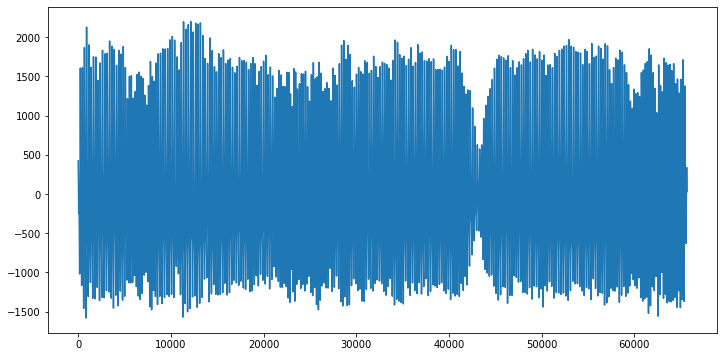

In [7]:
import matplotlib.pyplot as plt

sample_rate = 250
just_heart = np.array(only_time)
filtered_ppg = hp.filter_signal(just_heart, 
                                cutoff = [0.8, 2.5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

#And let's plot the same segment as under 'zoomed in!' above
plt.figure(figsize=(12,6))
plt.plot(filtered_ppg)
#plt.plot(filtered_ppg[0:((2*60)*32)])
plt.show()



bpm: 64.843984
ibi: 925.297872
sdnn: 76.122964
sdsd: 21.505776
rmssd: 32.619886
pnn20: 0.441281
pnn50: 0.124555
hr_mad: 48.500000
sd1: 23.065144
sd2: 105.115625
s: 7616.813607
sd1/sd2: 0.219426
breathingrate: 0.133333


<Figure size 864x432 with 0 Axes>

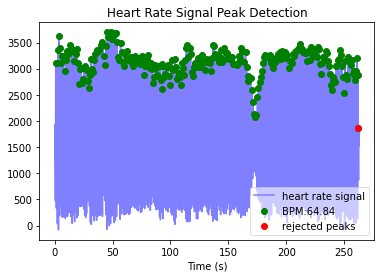

In [8]:
wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
plt.figure(figsize=(12,6))
hp.plotter(wd, m)


for key in m.keys():
    print('%s: %f' %(key, m[key]))


In [9]:
wd["RR_list"]

array([ 882.,  871.,  937., 1003.,  993.,  991.,  987.,  969.,  963.,
        973., 1007., 1022., 1035., 1017.,  983., 1002.,  989.,  970.,
        939.,  911.,  898.,  846.,  831.,  847.,  819.,  817.,  843.,
        828.,  785.,  843.,  836.,  804.,  825.,  814.,  812.,  826.,
        912.,  992.,  987., 1036., 1036., 1019., 1001.,  999., 1037.,
        910.,  924.,  986., 1024., 1032., 1056., 1077., 1061., 1002.,
       1025., 1030., 1044., 1026., 1016.,  984.,  964.,  887.,  963.,
        996., 1023.,  980.,  966.,  993.,  991.,  985., 1007., 1008.,
       1013.,  982.,  969.,  971.,  913.,  932.,  934.,  879.,  876.,
        950.,  989., 1007.,  962.,  959.,  968.,  956.,  912.,  923.,
        889.,  846.,  851.,  842.,  791.,  703.,  722.,  726.,  758.,
        808.,  876.,  856.,  852.,  892.,  897.,  839.,  820.,  833.,
        847.,  816.,  810.,  818.,  832.,  844.,  874.,  899.,  846.,
        875.,  920.,  928.,  919.,  955.,  941.,  935.,  901.,  904.,
        935.,  913.,

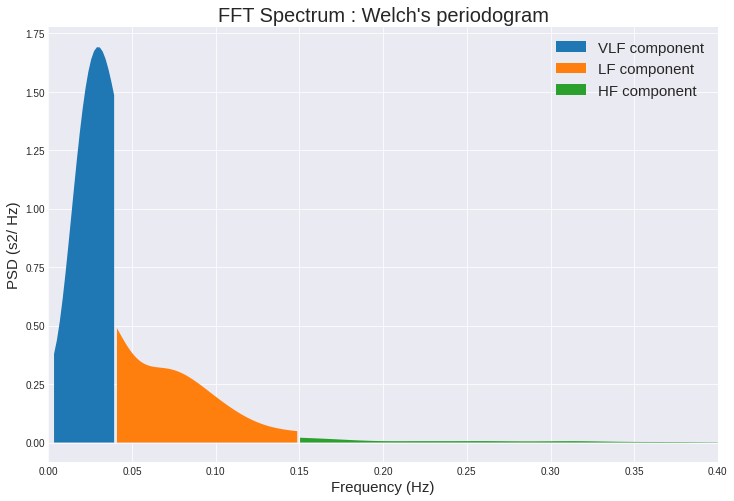

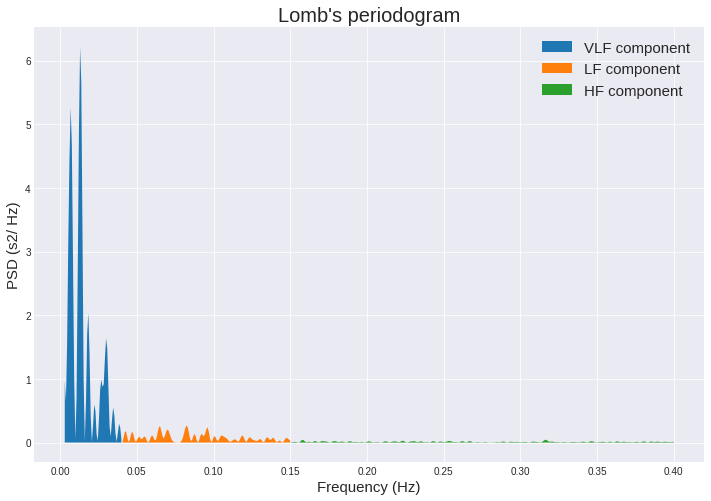

In [10]:
from hrvanalysis import plot_psd

# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = wd["RR_list"]

plot_psd(nn_intervals_list, method="welch")
plot_psd(nn_intervals_list, method="lomb")

In [11]:
wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)

filtered_ppg


array([424.16464206, 407.37531425, 390.19708747, ...,  41.26161129,
        35.64448563,  30.52137513])

In [12]:
filtered_ppg[340]

-910.7780563378292

In [13]:
wd

{'hr': array([1921.2556592 , 1904.46633138, 1887.28810461, ..., 1538.35262843,
        1532.73550276, 1527.61239227]),
 'sample_rate': 250,
 'peaklist': [223.75,
  444.25,
  662.0,
  896.25,
  1147.0,
  1395.25,
  1643.0,
  1889.75,
  2132.0,
  2372.75,
  2616.0,
  2867.75,
  3123.25,
  3382.0,
  3636.25,
  3882.0,
  4132.5,
  4379.75,
  4622.25,
  4857.0,
  5084.75,
  5309.25,
  5520.75,
  5728.5,
  5940.25,
  6145.0,
  6349.25,
  6560.0,
  6767.0,
  6963.25,
  7174.0,
  7383.0,
  7584.0,
  7790.25,
  7993.75,
  8196.75,
  8403.25,
  8631.25,
  8879.25,
  9126.0,
  9385.0,
  9644.0,
  9898.75,
  10149.0,
  10398.75,
  10658.0,
  10885.5,
  11116.5,
  11363.0,
  11619.0,
  11877.0,
  12141.0,
  12410.25,
  12675.5,
  12926.0,
  13182.25,
  13439.75,
  13700.75,
  13957.25,
  14211.25,
  14457.25,
  14698.25,
  14920.0,
  15160.75,
  15409.75,
  15665.5,
  15910.5,
  16152.0,
  16400.25,
  16648.0,
  16894.25,
  17146.0,
  17398.0,
  17651.25,
  17896.75,
  18139.0,
  18381.75,
  18610.

In [14]:
len(wd["RR_list"])

283

In [15]:
from hrvanalysis import get_time_domain_features

sum(wd["RR_list"][0:53]) # first 60 s
skup = wd["RR_list"][0:53]
time_domain_features = get_time_domain_features(skup)
print(time_domain_features)

print("S2 ratio",time_domain_features["sdnn"]/time_domain_features["rmssd"])

{'mean_nni': 939.7547169811321, 'sdnn': 84.90943266898182, 'sdsd': 36.105301902127714, 'nni_50': 8, 'pnni_50': 15.384615384615385, 'nni_20': 22, 'pnni_20': 42.30769230769231, 'rmssd': 36.269026836852234, 'median_nni': 970.0, 'range_nni': 292.0, 'cvsd': 0.03859414183454471, 'cvnni': 0.09035276028381625, 'mean_hr': 64.37984010296682, 'max_hr': 76.43312101910828, 'min_hr': 55.710306406685234, 'std_hr': 5.973655950563311}
S2 ratio 2.3411003843838194


In [16]:
sum(wd["RR_list"][53:]) # last 60 s
skup2 = wd["RR_list"][53:]
time_domain_features2 = get_time_domain_features(skup2)
print(time_domain_features2)
print(time_domain_features2["sdnn"]/time_domain_features2["rmssd"])

{'mean_nni': 918.2260869565217, 'sdnn': 92.90884492323953, 'sdsd': 58.633756102961016, 'nni_50': 27, 'pnni_50': 11.790393013100436, 'nni_20': 102, 'pnni_20': 44.54148471615721, 'rmssd': 58.77635058972519, 'median_nni': 941.0, 'range_nni': 979.0, 'cvsd': 0.06401076099301486, 'cvnni': 0.10118297251953243, 'mean_hr': 69.25509801095787, 'max_hr': 923.0769230769231, 'min_hr': 57.47126436781609, 'std_hr': 56.699817163875785}
1.5807181628503677


In [9]:
def s2_t(signal_peaks, window_size,t):
    absolute_times = np.cumsum(signal_peaks)
    
    
    
    filtered_times = (peak for peak,time in zip(signal_peaks,absolute_times) if t-window_size<time<=t)
    return s2(filtered_times)

import functools
    
@functools.lru_cache    
def s2(filtered_times):
    time_domain_features = get_time_domain_features(list(filtered_times))
    return time_domain_features["sdnn"]/time_domain_features["rmssd"]

In [10]:
#wszystkie_timingi = wd["RR_list"]
@interact
def change_window(window_size =  30000):
    #window_size = 30000
    wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    plt.plot(wykres_czasy[:,0], wykres_czasy[:,1],"*")
    plt.title(f"S2 with {window_size} window size")

interactive(children=(IntSlider(value=30000, description='window_size', max=90000, min=-30000), Output()), _do…

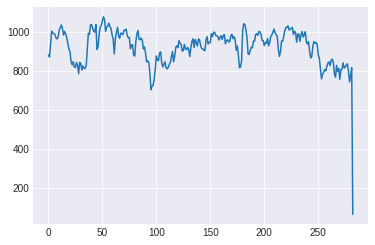

In [19]:
plt.plot(wd["RR_list"])

In [16]:
def gen_s2_graph(cs_filename, window_size = 30000):
    numerical_columns = ["col {}".format(el) for el in range(50)]
    heartrate_file = pandas.read_csv(cs_filename,
                                 names = ["time","rri", "error"]+ numerical_columns)
    

    sample_rate = 250
    only_time = heartrate_file[numerical_columns].stack()
    just_heart = np.array(only_time)
    filtered_ppg = hp.filter_signal(just_heart, 
                                    cutoff = [0.8, 2.5], 
                                    filtertype = 'bandpass',
                                    sample_rate = sample_rate, 
                                    order = 3,
                                    return_top = False)
    
    wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
    wszystkie_timingi = wd["RR_list"]
    
    timingi_raw = np.array(heartrate_file["rri"][heartrate_file["rri"]!=0])
    wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    
    
    wykres_czasy2 = np.array([[tt, s2_t(timingi_raw,window_size,tt)] for tt in range(window_size, int(sum(timingi_raw)),1000)])
    #%debug
    plt.plot(wykres_czasy[:,0], wykres_czasy[:,1],"*", wykres_czasy2[:,0], wykres_czasy2[:,1],"r*")
    plt.ylim([0,3])
    plt.title(f"S2 with {window_size} window size")
    plt.legend(["RRi calculated by python", "RRi calculated by microcontroller"])

In [20]:
WS = 30000

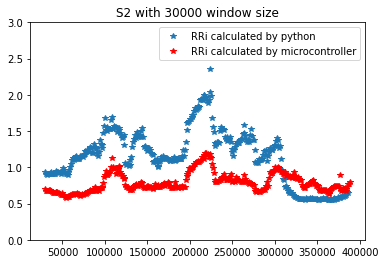

In [21]:
gen_s2_graph("results/mori1__2022-05-23T06_24_10.222504.csv",WS)

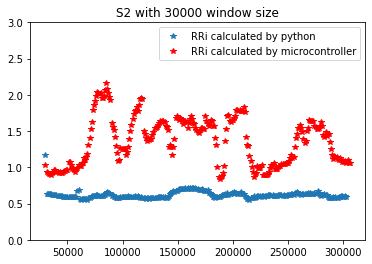

In [22]:
gen_s2_graph("results/mori1_rel__2022-05-23T06_31_23.564297.csv",WS)

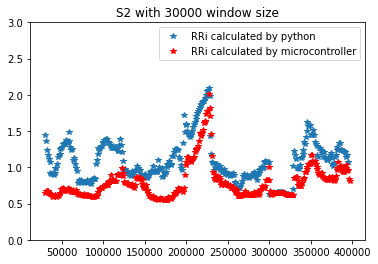

In [25]:
gen_s2_graph("results/mori2__2022-05-23T06_38_23.139399.csv",WS)

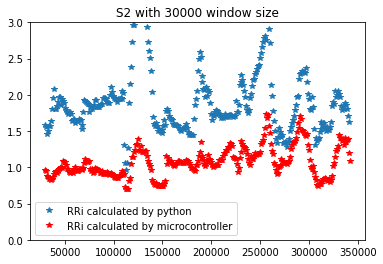

In [24]:
gen_s2_graph("results/mori2_rel__2022-05-23T06_45_23.149977.csv",WS)

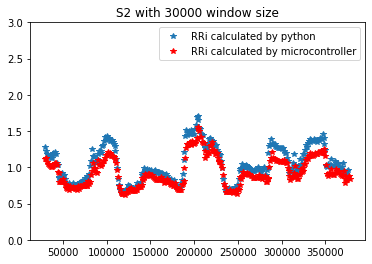

In [26]:
gen_s2_graph("results/takato1__2022-05-23T06_54_00.390510.csv",WS)

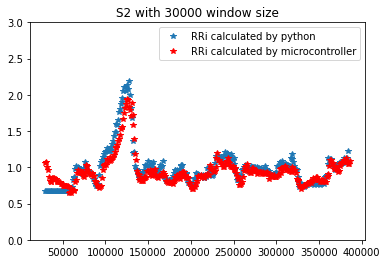

In [27]:
gen_s2_graph("results/chokki1__2022-05-23T07_20_51.710150.csv",WS)

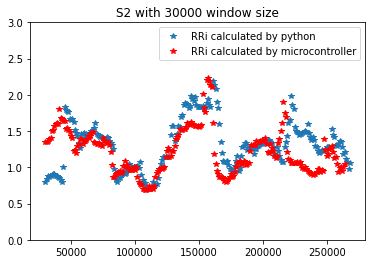

In [28]:
gen_s2_graph("results/chokki1_rel__2022-05-23T07_27_34.402215.csv",WS)

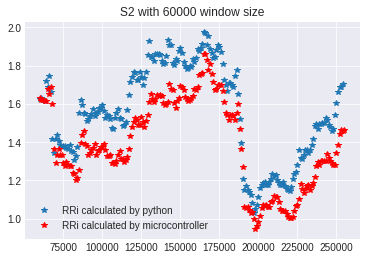

In [107]:
gen_s2_graph("results/art_b__2022-05-20T07_09_41.198756.csv",WS)

In [87]:
def s2_val(cs_filename, window_size = 60000, raw = False):
    numerical_columns = ["col {}".format(el) for el in range(50)]
    heartrate_file = pandas.read_csv(cs_filename,
                                 names = ["time","rri", "error"]+ numerical_columns)
    

    sample_rate = 250
    only_time = heartrate_file[numerical_columns].stack()
    just_heart = np.array(only_time)
    filtered_ppg = hp.filter_signal(just_heart, 
                                    cutoff = [0.8, 2.5], 
                                    filtertype = 'bandpass',
                                    sample_rate = sample_rate, 
                                    order = 3,
                                    return_top = False)
    
    wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
    wszystkie_timingi = wd["RR_list"]
    
    timingi_raw = np.array(heartrate_file["rri"][heartrate_file["rri"]!=0])
    if raw:
        return [s2_t(timingi_raw, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    return [s2_t(wszystkie_timingi, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    #wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    
    

In [88]:
### make s2 distribution
# filelist

import glob
n_focus = glob.glob("heartrate_data/*rel*")
focus = list(set(glob.glob("heartrate_data/*"))- set(n_focus))

# take each file generate list of s2

n_focus_s2 = [s2_val(filn, raw = True) for filn in n_focus]
focus_s2 =  [s2_val(filn, raw = True) for filn in focus]

### put them together

### see distribution?


/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


array([<AxesSubplot:title={'center':'focused'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'not focused'}, ylabel='Frequency'>],
      dtype=object)

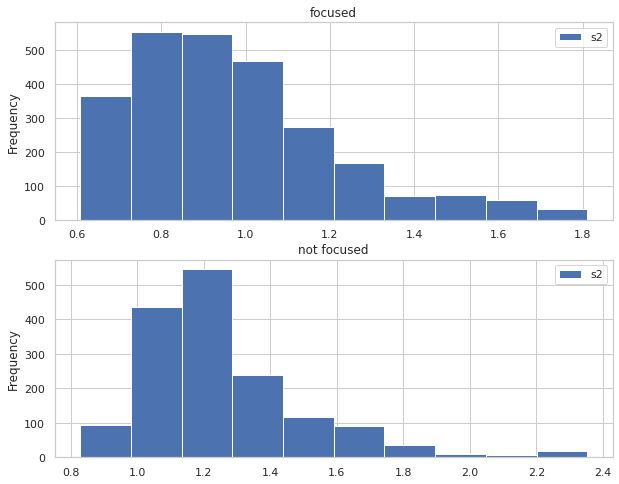

In [89]:
n_focus_df = pandas.DataFrame(sum(n_focus_s2,[]),columns = ["s2"])

n_focus_df["status"] = "not focused"

focus_df = pandas.DataFrame(sum(focus_s2,[]),columns = ["s2"])

focus_df["status"] = "focused"


all_df = pandas.concat([focus_df,n_focus_df])
all_df.plot.hist(column=["s2"], by="status", figsize=(10, 8), bins = 10)

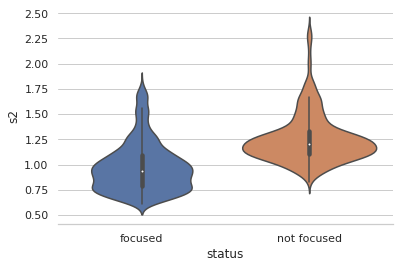

In [90]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=all_df, x="status", y="s2")
sns.despine(left=True)

In [53]:
!pip install seaborn

     |████████████████████████████████| 292 kB 5.2 MB/s eta 0:00:01


/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


array([<AxesSubplot:title={'center':'focused'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'not focused'}, ylabel='Frequency'>],
      dtype=object)

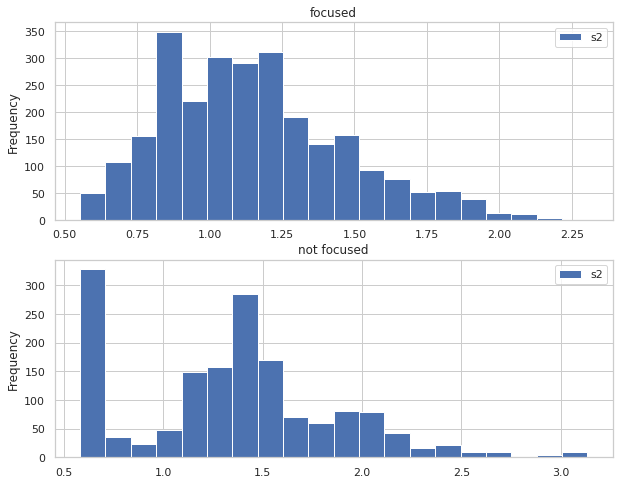

In [93]:
n_focus = glob.glob("heartrate_data/*rel*")
focus = list(set(glob.glob("heartrate_data/*"))- set(n_focus))

# take each file generate list of s2

n_focus_s2 = [s2_val(filn, raw = False) for filn in n_focus]
focus_s2 =  [s2_val(filn, raw = False) for filn in focus]


n_focus_df = pandas.DataFrame(sum(n_focus_s2,[]),columns = ["s2"])

n_focus_df["status"] = "not focused"

focus_df = pandas.DataFrame(sum(focus_s2,[]),columns = ["s2"])

focus_df["status"] = "focused"


all_df = pandas.concat([focus_df,n_focus_df])
all_df.plot.hist(column=["s2"], by="status", figsize=(10, 8), bins = 20)
#focus_df.plot.kde(column=["s2"], figsize=(10, 8))
#n_focus_df.plot.kde(column=["s2"], figsize=(10, 8))


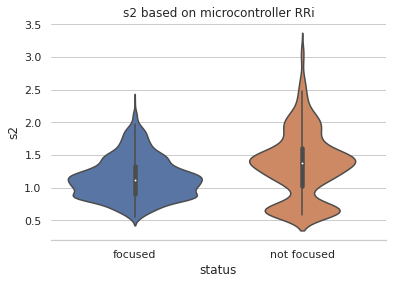

In [94]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=all_df, x="status", y="s2").set(title='s2 based on microcontroller RRi')
sns.despine(left=True)


<AxesSubplot:>

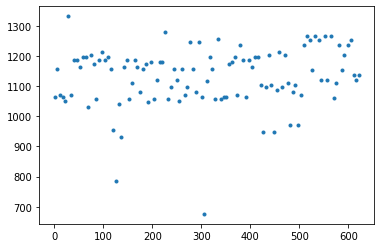

In [25]:
### RRI

heartrate_rri = heartrate_file[["time","rri"]]
heartrate_rri_non = heartrate_rri[heartrate_file["rri"]!=0]
heartrate_rri_non["rri"].plot(style=".")

In [55]:
#!pip install heartpy

data, _ = hp.load_exampledata(0) #this example set is sampled at 100Hz
pandas.DataFrame(data)

,0
0,530.0
1,518.0
2,506.0
3,494.0
4,483.0
...,...
2478,489.0
2479,491.0
2480,492.0
2481,493.0


In [59]:
import numpy as np

np.array(only_time)

array([5000, 5000, 5000, ..., 1178, 1225, 1204])

In [93]:
heartrate_file = pandas.read_csv("prof_igor__2022-04-27T08_45_26.840386.csv",names = ["time","heartrate"])

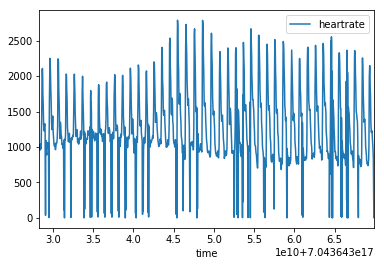

In [94]:
heartrate_file["filtered"]= heartrate_file["heartrate"]


heartrate_file.plot(x="time",y="heartrate")

In [95]:
from ipywidgets import interact, IntSlider

In [96]:
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(heartrate_file), value = len(heartrate_file)), offset = IntSlider(min=0, max = len(heartrate_file), value = 0)):
    heartrate_file.iloc[ffrom + offset:tto + offset].plot(y="heartrate",ylim = (0,2500)) # ,style='.'

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=1316, description='tt…

In [29]:
29588568000 /1000000000

dsfsfdsfdsdfsdfsdfsd

29.588568